In [7]:
import pandas as pd
df = pd.read_csv("UNAIR - GRAPH.csv", sep = ";")

In [8]:
df.head()

,DEBITOR NAME,DEBITOR BANK,SENDER/RECIPIENT NAME 2,SENDER/RECIPIENT ACCOUNT,SENDER/RECIPIENT BANK,AMOUNT_TX_IDR,TRX,Type,DEBITOR GCIF,DEBITOR CIF,LOB,LOB Desc
0,ENDANG WIDIASTUTI,"PT. BANK MAYBANK INDONESIA, TBK",MICHAEL B BOWMAN 2676 CRAZYHORSE PASS AUSTIN T...,69A18885,"BANK OF AMERICA, N.A.",4.240722e+08,1,INCOMING,G000106732,5050344.0,3003.0,Consumer
1,EDDI DJOHAN,"PT. BANK MAYBANK INDONESIA, TBK",SENTRAL NUSANTARA MAKMUR,1.19E+12,"PT. BANK MANDIRI (PERSERO), TBK",1.200000e+09,1,INCOMING,G000414672,7854765.0,2002.0,RSME
2,ORIGA MULIA FRP,"PT. BANK MAYBANK INDONESIA, TBK",ORINDO ERATEC,843389993,"PT. BANK CENTRAL ASIA, TBK",5.000000e+08,1,INCOMING,G000458836,116840.0,2003.0,SME+
3,BADE MAKMUR ORISSA,"PT. BANK MAYBANK INDONESIA, TBK",KENERTEC POWER SYSTEM,50346504,"PT. BANK NEGARA INDONESIA (PERSERO), TBK",5.500000e+09,1,INCOMING,G000473942,870324.0,2002.0,RSME
4,DWIRAJAYA SATYA,"PT. BANK MAYBANK INDONESIA, TBK",DWIRAJAYA SATYA,2533015131,"PT. BANK CENTRAL ASIA, TBK",1.250000e+08,1,INCOMING,G000520023,2756447.0,2002.0,RSME


In [13]:
# Buat kolom 'source' dan 'target' berdasarkan arah transaksi
def get_transaction_direction(row):
    if row['Type'].upper() == 'INCOMING':
        return pd.Series({
            'source': f"{row['SENDER/RECIPIENT NAME 2']} ({row['SENDER/RECIPIENT BANK']})",
            'target': f"{row['DEBITOR NAME']} ({row['DEBITOR BANK']})"
        })
    elif row['Type'].upper() == 'OUTGOING':
        return pd.Series({
            'source': f"{row['DEBITOR NAME']} ({row['DEBITOR BANK']})",
            'target': f"{row['SENDER/RECIPIENT NAME 2']} ({row['SENDER/RECIPIENT BANK']})"
        })
    else:
        return pd.Series({'source': None, 'target': None})

# Terapkan fungsi untuk membuat kolom source dan target
transaction_edges = df.copy()
transaction_edges[['source', 'target']] = transaction_edges.apply(get_transaction_direction, axis=1)

# Pilih kolom penting untuk analisis graf
graph_df = transaction_edges[['source', 'target', 'AMOUNT_TX_IDR', 'TRX', 'Type']]

In [14]:
graph_df

,source,target,AMOUNT_TX_IDR,TRX,Type
0,MICHAEL B BOWMAN 2676 CRAZYHORSE PASS AUSTIN T...,"ENDANG WIDIASTUTI (PT. BANK MAYBANK INDONESIA,...",4.240722e+08,1,INCOMING
1,SENTRAL NUSANTARA MAKMUR (PT. BANK MANDIRI (PE...,"EDDI DJOHAN (PT. BANK MAYBANK INDONESIA, TBK)",1.200000e+09,1,INCOMING
2,"ORINDO ERATEC (PT. BANK CENTRAL ASIA, TBK)","ORIGA MULIA FRP (PT. BANK MAYBANK INDONESIA, TBK)",5.000000e+08,1,INCOMING
3,KENERTEC POWER SYSTEM (PT. BANK NEGARA INDONES...,BADE MAKMUR ORISSA (PT. BANK MAYBANK INDONESIA...,5.500000e+09,1,INCOMING
4,"DWIRAJAYA SATYA (PT. BANK CENTRAL ASIA, TBK)","DWIRAJAYA SATYA (PT. BANK MAYBANK INDONESIA, TBK)",1.250000e+08,1,INCOMING
...,...,...,...,...,...
9396,"SANDY SOETJIANTO (PT. BANK MAYBANK INDONESIA, ...",SINAR LINTANG HORISON (PT. BANK NEGARA INDONES...,1.201600e+09,1,OUTGOING
9397,"ANASTASIA MAKMUR (PT. BANK MAYBANK INDONESIA, ...","ANASTASIA MAKMUR (PT. BANK CENTRAL ASIA, TBK)",1.500000e+09,1,OUTGOING
9398,"MARLINA ONLY SE (PT. BANK MAYBANK INDONESIA, TBK)","LINA LENGKONG (PT. BANK DANAMON INDONESIA, TBK)",5.000000e+08,1,OUTGOING
9399,WENANG PERMAI SENTOSA (PT. BANK MAYBANK INDONE...,"WENANG PERMAI SENTOSA (PT. BANK PERMATA, TBK)",1.600000e+09,4,OUTGOING


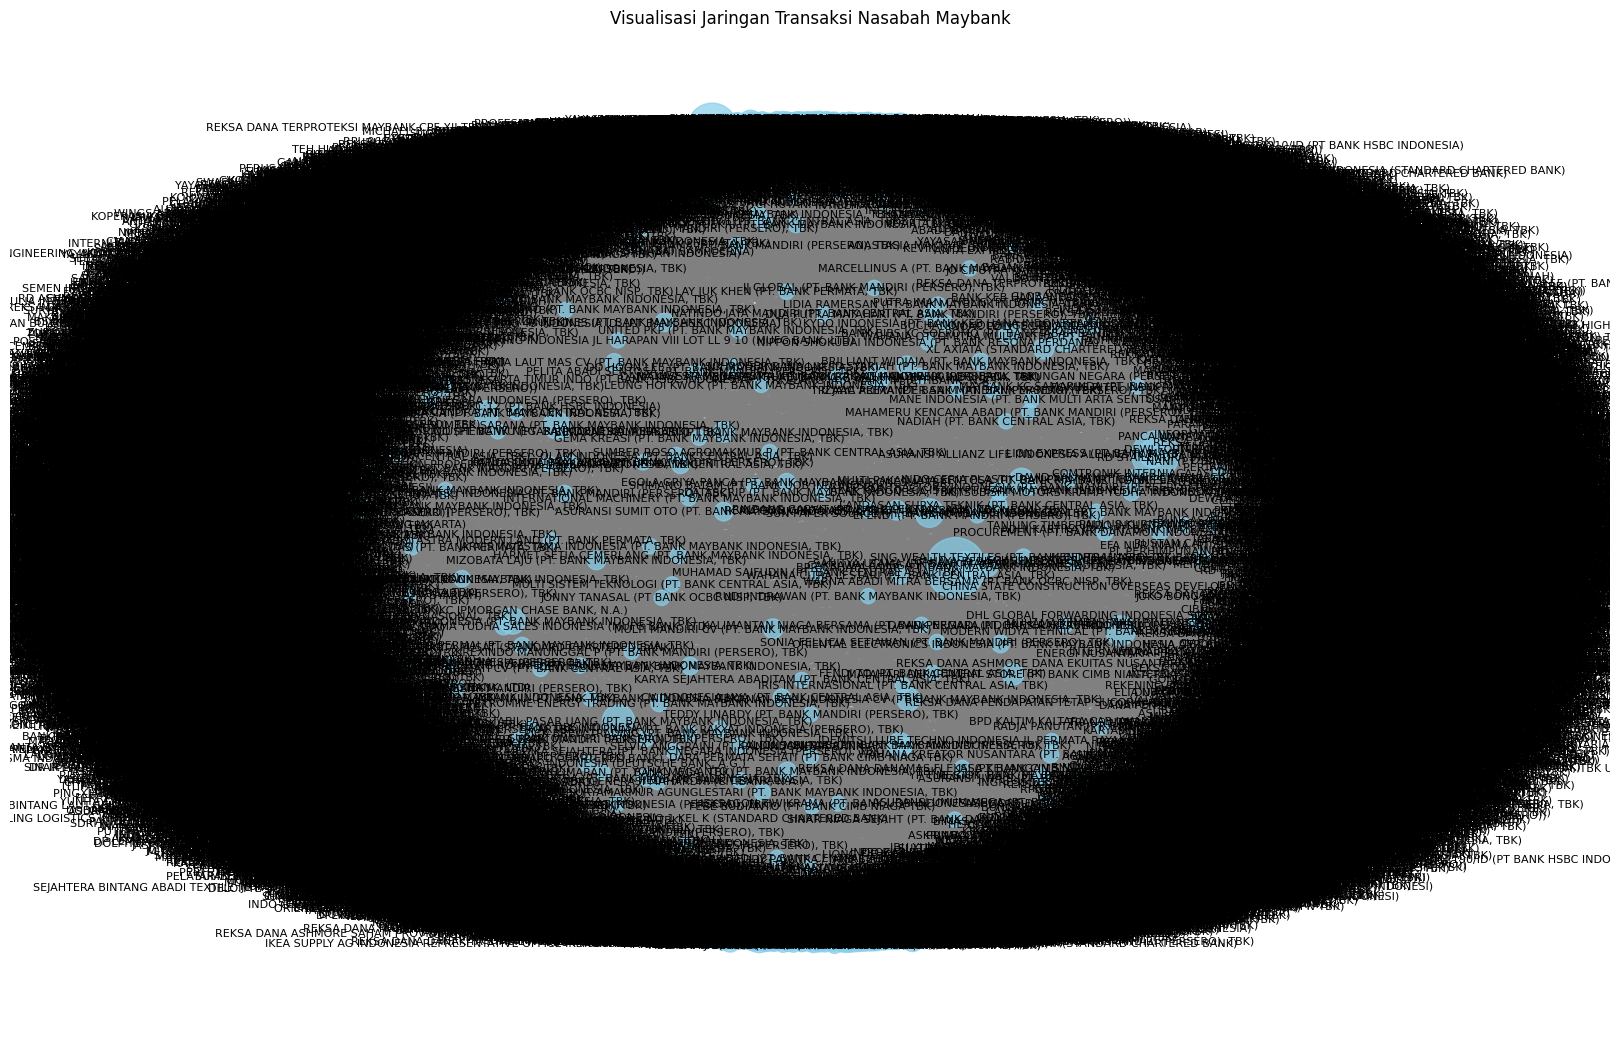

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Buat directed graph dari data
G = nx.from_pandas_edgelist(
    graph_df,
    source='source',
    target='target',
    edge_attr=['AMOUNT_TX_IDR', 'TRX', 'Type'],
    create_using=nx.DiGraph()
)

# Tentukan ukuran node berdasarkan degree
node_sizes = [100 + 20 * G.degree(n) for n in G.nodes()]

# Gambar graf
plt.figure(figsize=(16, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)  # Penempatan node otomatis
nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color="skyblue", edge_color='gray', alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Visualisasi Jaringan Transaksi Nasabah Maybank")
plt.show()

# nyoba 2

In [4]:
import pandas as pd
df = pd.read_excel("UNAIR - GRAPH NEW.xlsx", sheet_name="UNAIR - GRAPH")
df

,debitor_name,debitor_bank,sender_recipient_name,sender_recipient_bank,amount_tx_idr,trx,type
0,N1,B1,N4929,B2,4.240722e+08,1,INCOMING
1,N2,B1,N4930,B3,1.200000e+09,1,INCOMING
2,N3,B1,N4931,B4,5.000000e+08,1,INCOMING
3,N4,B1,N2411,B5,5.500000e+09,1,INCOMING
4,N5,B1,N5,B4,1.250000e+08,1,INCOMING
...,...,...,...,...,...,...,...
9396,N3040,B1,N7394,B106,1.201600e+09,1,OUTGOING
9397,N4925,B1,N4925,B4,1.500000e+09,1,OUTGOING
9398,N4926,B1,N9397,B7,5.000000e+08,1,OUTGOING
9399,N4927,B1,N4927,B14,1.600000e+09,4,OUTGOING


In [ ]:
# Clean and standardize text fields
def clean_text(text):
    return str(text).strip().upper()

# Create entity names
df['debitor_entity'] = df['debitor_name'].apply(clean_text) + " (" + df['debitor_bank'].apply(clean_text) + ")"
df['recipient_entity'] = df['sender_recipient_name'].apply(clean_text) + " (" + df['sender_recipient_bank'].apply(clean_text) + ")"

# Define transaction direction based on 'type'
def determine_direction(row):
    if row['type'].upper() == 'INCOMING':
        return pd.Series({'source': row['recipient_entity'], 'target': row['debitor_entity']})
    else:
        return pd.Series({'source': row['debitor_entity'], 'target': row['recipient_entity']})

# Apply direction logic
df[['source', 'target']] = df.apply(determine_direction, axis=1)

# Select the relevant columns for transaction edges
graph_df = df[['source', 'target', 'amount_tx_idr', 'trx', 'type']]

In [23]:
graph_df

,source,target,amount_tx_idr,trx,type
0,N4929 (B2),N1 (B1),4.240722e+08,1,INCOMING
1,N4930 (B3),N2 (B1),1.200000e+09,1,INCOMING
2,N4931 (B4),N3 (B1),5.000000e+08,1,INCOMING
3,N2411 (B5),N4 (B1),5.500000e+09,1,INCOMING
4,N5 (B4),N5 (B1),1.250000e+08,1,INCOMING
...,...,...,...,...,...
9396,N3040 (B1),N7394 (B106),1.201600e+09,1,OUTGOING
9397,N4925 (B1),N4925 (B4),1.500000e+09,1,OUTGOING
9398,N4926 (B1),N9397 (B7),5.000000e+08,1,OUTGOING
9399,N4927 (B1),N4927 (B14),1.600000e+09,4,OUTGOING


In [30]:
# Generate list of nodes and calculate degrees
source_nodes = graph_df[['source']].rename(columns={'source': 'entity'})
target_nodes = graph_df[['target']].rename(columns={'target': 'entity'})
all_nodes = pd.concat([source_nodes, target_nodes]).drop_duplicates().reset_index(drop=True)

# Calculate in-degree and out-degree
in_degrees = graph_df['target'].value_counts().rename('in_degree')
out_degrees = graph_df['source'].value_counts().rename('out_degree')

# Merge with node list
node_stats = all_nodes.set_index('entity').join(in_degrees).join(out_degrees).fillna(0).reset_index()
node_stats['total_degree'] = node_stats['in_degree'] + node_stats['out_degree']

In [31]:
graph_df.to_csv("edges.csv", index=False)
node_stats.to_csv("nodes.csv", index=False)

In [26]:
node_stats

,entity,in_degree,out_degree,total_degree
0,N4929 (B2),0.0,1.0,1.0
1,N4930 (B3),0.0,1.0,1.0
2,N4931 (B4),0.0,1.0,1.0
3,N2411 (B5),0.0,3.0,3.0
4,N5 (B4),0.0,1.0,1.0
...,...,...,...,...
12526,N4924 (B4),1.0,0.0,1.0
12527,N7394 (B106),1.0,0.0,1.0
12528,N4925 (B4),1.0,0.0,1.0
12529,N9397 (B7),1.0,0.0,1.0


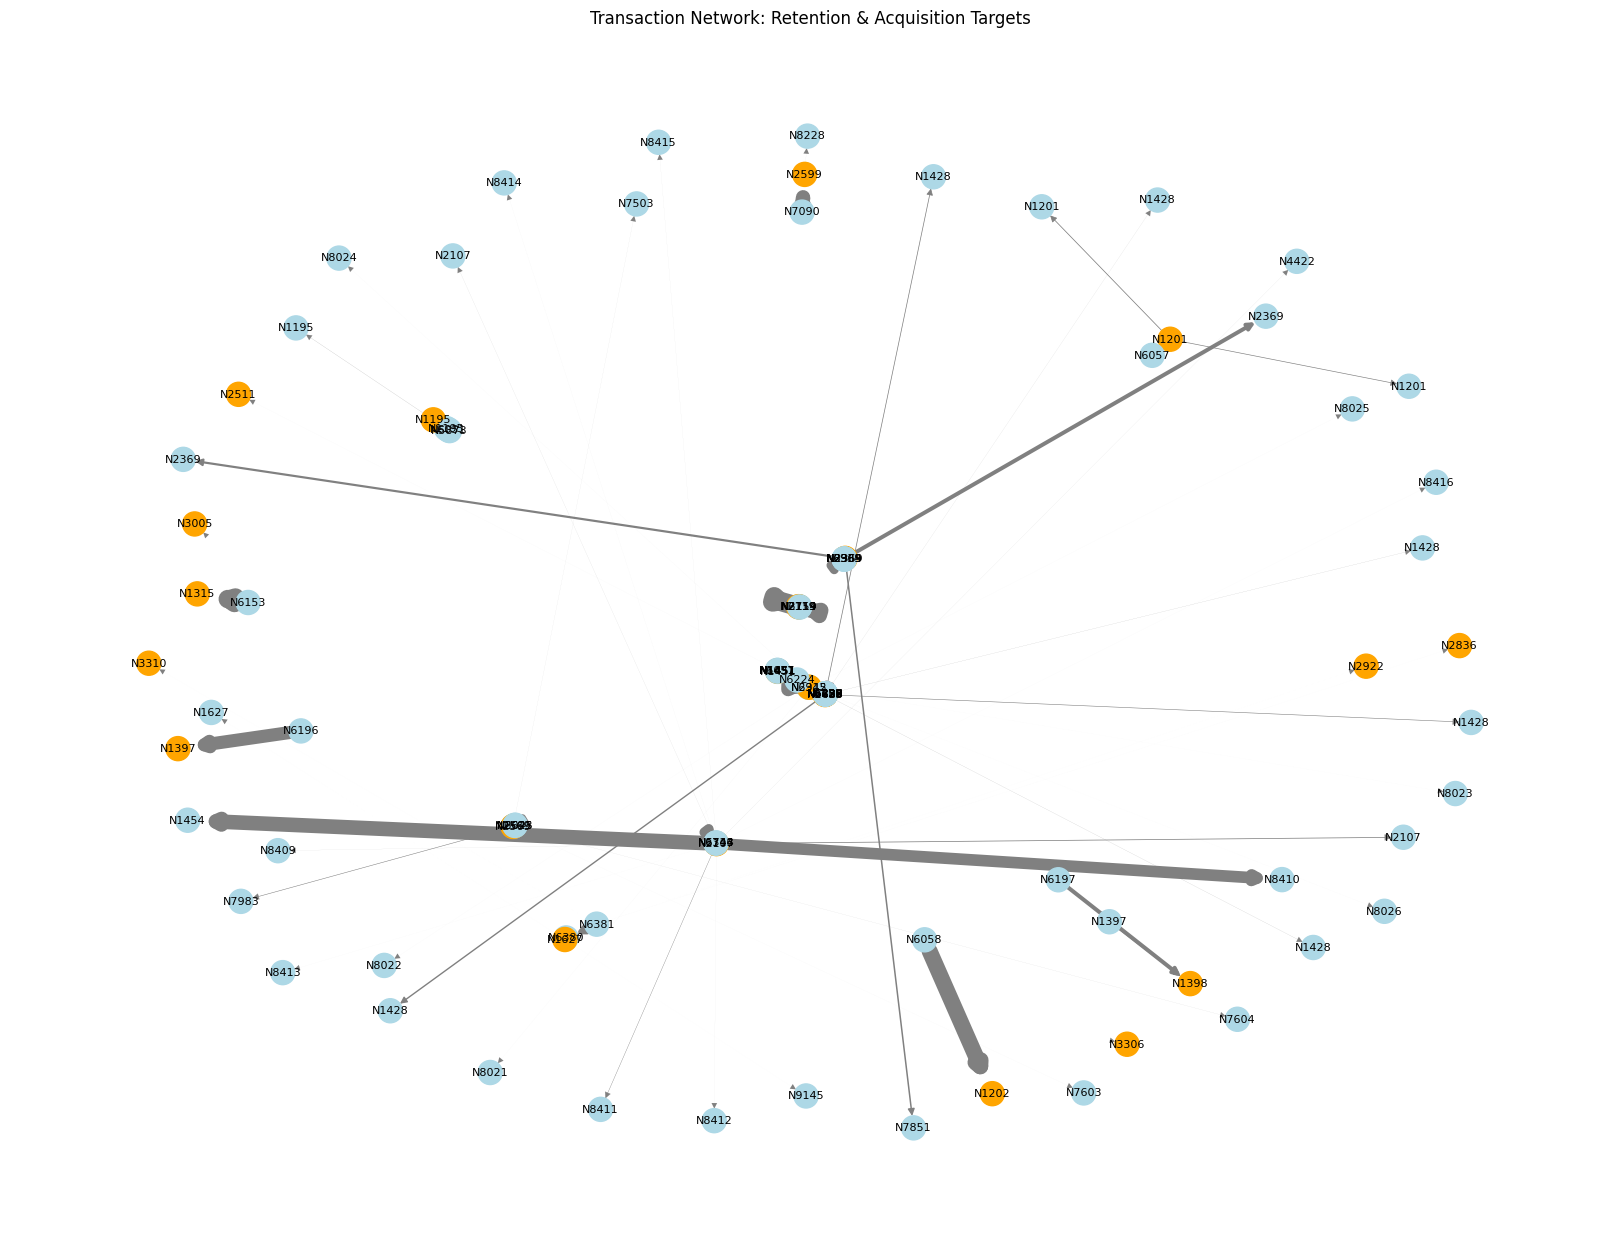

In [6]:
# Full analysis workflow
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Data Cleansing and Structuring
df_cleaned = df.copy()

# Step 2: Construct Directed Graph
G = nx.DiGraph()
for _, row in df_cleaned.iterrows():
    debtor = (row['debitor_name'], row['debitor_bank'])
    counterparty = (row['sender_recipient_name'], row['sender_recipient_bank'])
    amount = row['amount_tx_idr']
    
    if row['type'] == 'INCOMING':
        G.add_edge(counterparty, debtor, weight=amount)
    else:
        G.add_edge(debtor, counterparty, weight=amount)

# Step 3: Calculate Node Metrics
metrics = []
for node in G.nodes():
    in_deg = G.in_degree(node, weight='weight')
    out_deg = G.out_degree(node, weight='weight')
    metrics.append({
        'entity_name': node[0],
        'entity_bank': node[1],
        'in_degree_weighted': in_deg,
        'out_degree_weighted': out_deg,
        'total_degree_weighted': in_deg + out_deg
    })

metrics_df = pd.DataFrame(metrics)

# Step 4: Segmentation
retention_targets = metrics_df[metrics_df['entity_bank'] == 'B1'].sort_values(by='in_degree_weighted', ascending=False).head(15)
acquisition_targets = metrics_df[metrics_df['entity_bank'] != 'B1'].sort_values(by='out_degree_weighted', ascending=False).head(15)

# Step 5: Create Visual Network from top entities
top_entities = set([ (row['entity_name'], row['entity_bank']) for _, row in pd.concat([retention_targets, acquisition_targets]).iterrows() ])
connected_nodes = set()
for src, dst in G.edges():
    if src in top_entities or dst in top_entities:
        connected_nodes.add(src)
        connected_nodes.add(dst)

subgraph = G.subgraph(connected_nodes)

# Step 6: Visualize
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(subgraph, seed=42)
edge_weights = [subgraph[u][v]['weight'] / 1e11 for u, v in subgraph.edges()]
node_colors = ['orange' if node[1] == 'B1' else 'lightblue' for node in subgraph.nodes()]

nx.draw(subgraph, pos, with_labels=False, node_color=node_colors,
        edge_color='gray', width=edge_weights, node_size=300)

labels = {node: node[0] for node in subgraph.nodes()}
nx.draw_networkx_labels(subgraph, pos, labels, font_size=8)
plt.title("Transaction Network: Retention & Acquisition Targets")
plt.show()

In [14]:
import pandas as pd
import networkx as nx
from pyvis.network import Network

# Load data
df = pd.read_excel("UNAIR - GRAPH NEW.xlsx", sheet_name="UNAIR - GRAPH")

# Create directed graph
G = nx.DiGraph()
for _, row in df.iterrows():
    debtor = (row['debitor_name'], row['debitor_bank'])
    partner = (row['sender_recipient_name'], row['sender_recipient_bank'])
    amount = row['amount_tx_idr']
    if row['type'] == 'INCOMING':
        G.add_edge(partner, debtor, weight=amount)
    else:
        G.add_edge(debtor, partner, weight=amount)

# Compute node metrics
metrics = []
for node in G.nodes():
    in_w = G.in_degree(node, weight='weight')
    out_w = G.out_degree(node, weight='weight')
    metrics.append({
        'entity_name': node[0],
        'entity_bank': node[1],
        'in_degree_weighted': in_w,
        'out_degree_weighted': out_w,
        'total_degree_weighted': in_w + out_w
    })
metrics_df = pd.DataFrame(metrics)

# Select top entities
retention_targets = metrics_df[metrics_df['entity_bank'] == 'B1'].nlargest(10, 'in_degree_weighted')
acquisition_targets = metrics_df[metrics_df['entity_bank'] != 'B1'].nlargest(10, 'out_degree_weighted')
important_nodes = set([(row['entity_name'], row['entity_bank']) for _, row in pd.concat([retention_targets, acquisition_targets]).iterrows()])

# Build focused subgraph
H = nx.DiGraph()
for u, v, d in G.edges(data=True):
    if u in important_nodes or v in important_nodes:
        H.add_edge(u, v, weight=d['weight'])

# Visualize with pyvis
net = Network(height="700px", width="100%", directed=True)
net.barnes_hut()
for node in H.nodes():
    total_tx = H.in_degree(node, weight='weight') + H.out_degree(node, weight='weight')
    net.add_node(str(node), label=f"{node[0]} ({node[1]})",
                 size=total_tx / 1e9,
                 color="orange" if node[1] == "B1" else "lightblue")

for u, v, d in H.edges(data=True):
    net.add_edge(str(u), str(v), value=d['weight'], title=f"{d['weight']/1e9:.1f} B")

net.save_graph("transaction_network_analysis.html")


In [15]:
import webbrowser
webbrowser.open("transaction_network_analysis.html")


True

In [16]:
# Load the uploaded file
file_path = "transaction_network_data_degcount.xlsx"
nodes_df = pd.read_excel(file_path, sheet_name='nodes')
edges_df = pd.read_excel(file_path, sheet_name='edges')

# Extract bank code from 'target' column
edges_df['target_bank'] = edges_df['target'].str.extract(r'\((B\d+)\)')

# Create new column to classify target type
edges_df['target_kategori'] = edges_df['target_bank'].apply(lambda x: 'Maybank' if x == 'B1' else 'Non-Maybank')

# Save updated file
# updated_path = "transaction_network_edges_with_target_kategori.xlsx"
# with pd.ExcelWriter(updated_path) as writer:
#     nodes_df.to_excel(writer, sheet_name='nodes', index=False)
#     edges_df.to_excel(writer, sheet_name='edges', index=False)

# updated_path


In [19]:
edges_df.to_excel("edges.xlsx", index=False)

In [4]:
# Import library yang diperlukan
import pandas as pd
import networkx as nx
from pyvis.network import Network

# Baca data dari file Excel baru
df = pd.read_excel("UNAIR - GRAPH NEW.xlsx")

# Buat network graph
net = Network(height='750px', width='100%', bgcolor='#ffffff', font_color='#000000')

# Buat dictionary untuk menyimpan informasi node
node_info = {}

# Tambahkan semua node dari source dan target
for _, row in df.iterrows():
    # Node source
    if row['source'] not in node_info:
        node_info[row['source']] = {
            'size': 20,
            'color': '#ff0000'
        }
    
    # Node target
    if row['target'] not in node_info:
        node_info[row['target']] = {
            'size': 20,
            'color': '#0000ff'
        }

# Tambahkan node ke network
for node, info in node_info.items():
    net.add_node(node, size=info['size'], color=info['color'], title=node)

# Tambahkan edges berdasarkan transaksi
for _, row in df.iterrows():
    # Tentukan arah edge berdasarkan tipe transaksi
    if row['type'] == 'INCOMING':
        net.add_edge(row['target'], row['source'], value=row['amount_tx_idr']/1e9,
                    title=f"Amount: {row['amount_tx_idr']:,.2f} IDR\nTransactions: {row['trx']}\nType: {row['type']}")
    else:  # OUTGOING
        net.add_edge(row['source'], row['target'], value=row['amount_tx_idr']/1e9,
                    title=f"Amount: {row['amount_tx_idr']:,.2f} IDR\nTransactions: {row['trx']}\nType: {row['type']}")

# Set physics layout
net.toggle_physics(True)
net.show_buttons(filter_=['physics'])

# Tampilkan network
net.show('network_graph.html')

KeyError: 'source'